<a href="https://colab.research.google.com/github/JotaBlanco/IntroAI/blob/main/Notebooks/Ejercicio_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRODUCCIÓN
En este notebook podéis resolver el ejercicio CHALLENGE sobre churn en una empresa telco.



Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1Rzsrt7jqXUUyHNQMq20xaCfQw-YamYdZzYjfJPxZ12Y/edit?usp=sharing)
*   [Enlace a este notebook](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_02_Optimizacion_Modelos/02B_%7C_Ejercicio_CHALLENGE.ipynb)


## 0101 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble

## 0102 Carga el dataset del Churn Telco para ENTRENAR
Aquí teneis el url del archivo raw del dataset de churn en una empresa Telco. OJO: este es el dataset para entrenar vuestro modelo, sobre el que conocemos el target (si un cliente ha realizado o no churn). 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/CHURN_DF_train.csv

Importa los datos en un dataframe llamado **dataframe df**.

In [2]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/CHURN_DF_train.csv'

# Importa csv
df = pd.read_csv(url, sep=',')

# Pequeña limpieza
df.loc[df['TotalCharges']==" ", 'TotalCharges'] = np.NaN
df['TotalCharges'] = df['TotalCharges'].astype(float)

print(len(df))

# Visualización primeras filas
df.head()

5043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,...,0,0,1,0,0,0,0,0,1,1
1,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,...,0,0,1,0,0,0,0,1,0,1
2,9305-CDSKC,Female,0,0,0,8,1,1,99.65,820.50,...,0,1,1,0,0,0,0,1,0,1
3,1452-KIOVK,Male,0,0,1,22,1,1,89.10,1949.40,...,0,0,1,0,0,0,1,0,0,0
4,6713-OKOMC,Female,0,0,0,10,0,0,29.75,301.90,...,0,0,1,0,0,0,0,0,1,0


# 02 EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               5043 non-null   object 
 1   gender                                   5043 non-null   object 
 2   SeniorCitizen                            5043 non-null   int64  
 3   Partner                                  5043 non-null   int64  
 4   Dependents                               5043 non-null   int64  
 5   tenure                                   5043 non-null   int64  
 6   PhoneService                             5043 non-null   int64  
 7   PaperlessBilling                         5043 non-null   int64  
 8   MonthlyCharges                           5043 non-null   float64
 9   TotalCharges                             5033 non-null   float64
 10  MultipleLines_No                         5043 no

In [4]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5033.00000,5043.000000,5043.000000,...,5043.00000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.162205,0.481459,0.296847,32.431687,0.906603,0.598057,65.123468,2299.22119,0.476502,0.093397,...,0.21396,0.388856,0.547293,0.209399,0.243308,0.216339,0.219512,0.333532,0.230617,0.269086
std,0.368675,0.499706,0.456914,24.637729,0.291017,0.490339,30.006342,2276.04620,0.499497,0.291017,...,0.41014,0.487539,0.497808,0.406920,0.429122,0.411789,0.413957,0.471521,0.421269,0.443529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.80000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,38.375000,411.60000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.700000,1405.30000,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,90.000000,3834.40000,1.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.80000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 03 Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar. 

Necesitamos limpiarlo antes de poder entrenar los modelos.

### 0301 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

OJO, todas las transformaciones que hagamos sobre el dataset de entrenamiento debereis hacerlas también sobre el de submisión.

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,...,0,0,1,0,0,0,0,0,1,1
1,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,...,0,0,1,0,0,0,0,1,0,1
2,9305-CDSKC,Female,0,0,0,8,1,1,99.65,820.50,...,0,1,1,0,0,0,0,1,0,1
3,1452-KIOVK,Male,0,0,1,22,1,1,89.10,1949.40,...,0,0,1,0,0,0,1,0,0,0
4,6713-OKOMC,Female,0,0,0,10,0,0,29.75,301.90,...,0,0,1,0,0,0,0,0,1,0


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'Payment

In [7]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

cat_cols = ['gender']

In [9]:
df = df[cols+['Churn']]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,Male,0,0,0,2,1,1,53.85,108.15,1,...,0,0,1,0,0,0,0,0,1,1
1,Female,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,0,0,0,1,0,1
2,Female,0,0,0,8,1,1,99.65,820.50,0,...,0,1,1,0,0,0,0,1,0,1
3,Male,0,0,1,22,1,1,89.10,1949.40,0,...,0,0,1,0,0,0,1,0,0,0
4,Female,0,0,0,10,0,0,29.75,301.90,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Female,0,0,0,72,1,1,21.15,1419.40,1,...,1,0,0,0,1,1,0,0,0,0
5039,Male,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,1,0,0,0,0,1,0
5040,Female,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,1,0,0,1,0,0,0
5041,Male,1,1,0,4,1,1,74.40,306.60,0,...,0,0,1,0,0,0,0,0,1,1


### 030102 Dumificación de variables categóricas
Recuerda que debemos transformar las variables categóricas para convertirlas en numéricas. 

In [10]:
df = pd.get_dummies(df[cols+['Churn']], 
                    prefix_sep='_',
                    drop_first=True, 
                    columns=cat_cols)

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,gender_Male
0,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,0,0,0,0,0,1,1,1
1,0,0,0,2,1,1,70.70,151.65,1,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,8,1,1,99.65,820.50,0,0,...,1,1,0,0,0,0,1,0,1,0
3,0,0,1,22,1,1,89.10,1949.40,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,10,0,0,29.75,301.90,0,1,...,0,1,0,0,0,0,0,1,0,0


### 030103 Limpieza de nulos
Recuerda que puedes mirarlo con dataframe.isna().sum() y si sí hay nulos, puedes rellenarlos con el método .fillna().

In [11]:
df.isna().sum()

SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               10
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
StreamingTV_No                              0
StreamingTV_No internet service             0
StreamingTV_Yes                             0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service  

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df.isna().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
StreamingTV_No                             0
StreamingTV_No internet service            0
StreamingTV_Yes                            0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

### 030104 Train - test

In [14]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X = df.drop('Churn',axis=1)
y = df['Churn']

# Comprueba sus tamaños
X.shape, y.shape

((5043, 40), (5043,))

In [15]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3378, 40), (1665, 40), (3378,), (1665,))

# 04 Entrena un modelo
Entrena un modelo y evalúa su calidad. Ten en cuenta todo lo que hemos visto: calidad de la predicción, posibilidad de overfitting...
Puedes utilizar cualquier tipo de modelo de los que se han visto en el máster hasta ahora. Por ejemplo:
- Árboles de decisión: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html.
- Random Forests: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html.
- Gradient Boosting: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html.
- AdaBoost: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html.
- XGBoost: https://xgboost.readthedocs.io/en/latest/parameter.html.

## 0401 Árbol de decisión


In [16]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree
import graphviz

In [17]:
# Inicializamos un árbol definiendo la profundidad
arbol = tree.DecisionTreeClassifier(max_depth=20, min_samples_split=50, min_samples_leaf=20)

In [18]:
# Entrena el árbol 
arbol.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, min_samples_split=50)

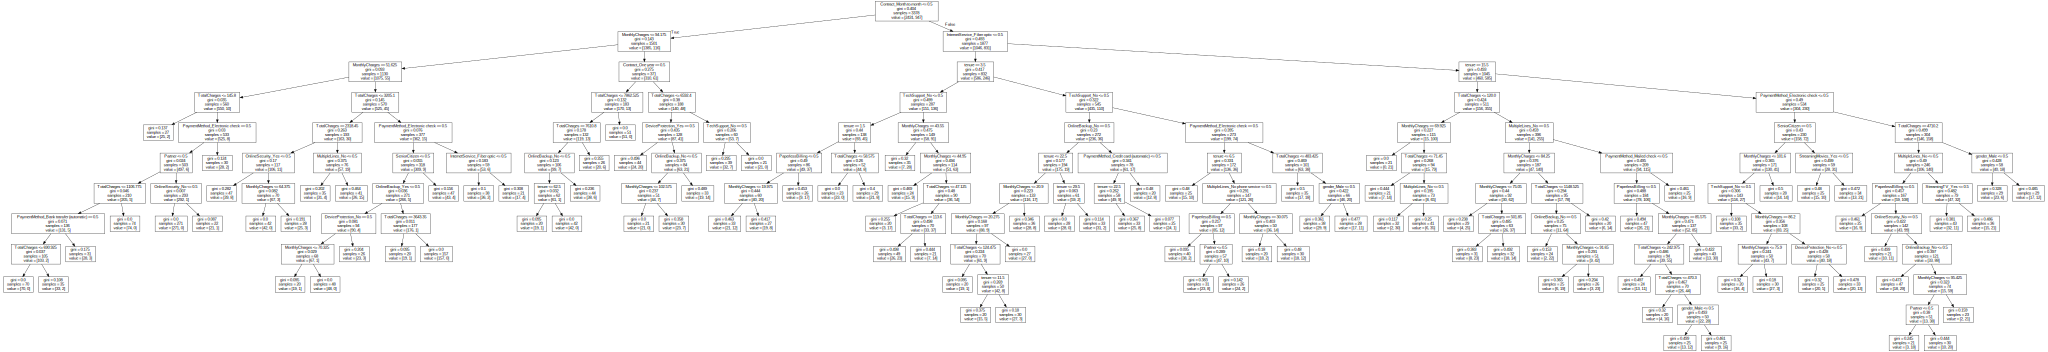

In [19]:
dot_data = tree.export_graphviz(arbol, 
                                out_file=None, 
                                feature_names=list(X.columns)) 
graph = graphviz.Source(dot_data) 
graph

In [20]:
# EVALUACIÓN CALIDAD DEL MODELO
# Uso el árbol para predecir sobre el dataset de entrenamiento
y_pred_train = arbol.predict(X_train)
# Uso el árbol para predecir sobre el dataset de test
y_pred_test = arbol.predict(X_test)
# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)
# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)
# Degradación de la predicción
print('Degradación: ' + str(round((ac_train-ac_test)/ac_train*100,2)) + '%')  

Precisión en set de entrenamiento : 0.82
Precisión en set de test : 0.8006
Degradación: 2.37%


In [33]:
df_oferta = pd.DataFrame({ 
    "CHURN": y_test, 
    "PROB_PRED": [proba[1] for proba in arbol.predict_proba(X_test)]
    })

df_oferta = df_oferta.sort_values("PROB_PRED", ascending=False)
df_oferta

,CHURN,PROB_PRED
4153,1,1.0
2369,1,1.0
4959,1,1.0
3909,1,1.0
3209,1,1.0
...,...,...
4357,0,0.0
1094,0,0.0
3014,0,0.0
152,0,0.0


In [34]:
df_oferta["CHURN"].mean()

0.24624624624624625

In [35]:
df_oferta["CHURN"].iloc[:100].mean()

0.74

In [36]:
df_oferta["CHURN"].iloc[-100:].mean()

0.01

## XGBoost
Modelo avanzado estado del arte basado en la adicción de muchos árboles de decisión.

In [46]:
from xgboost import XGBClassifier

In [62]:
XGB = XGBClassifier(n_estimators = 250, max_depth = 6, gamma=5)

In [63]:
XGB.fit(X=X_train, y=y_train)

XGBClassifier(gamma=5, max_depth=6, n_estimators=250)

In [64]:
# EVALUACIÓN CALIDAD DEL MODELO
# Uso el xgb para predecir sobre el dataset de entrenamiento
y_pred_train = XGB.predict(X_train)
# Uso el xgb para predecir sobre el dataset de test
y_pred_test = XGB.predict(X_test)
# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)
# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)
# Degradación de la predicción
print('Degradación: ' + str(round((ac_train-ac_test)/ac_train*100,2)) + '%')  

Precisión en set de entrenamiento : 0.8316
Precisión en set de test : 0.8114
Degradación: 2.43%


In [66]:
df_oferta = pd.DataFrame({ 
    "CHURN": y_test, 
    "PROB_PRED": [proba[1] for proba in XGB.predict_proba(X_test)]
    })

df_oferta = df_oferta.sort_values("PROB_PRED", ascending=False)
df_oferta

,CHURN,PROB_PRED
252,0,0.888721
3936,1,0.888721
2622,1,0.879288
326,0,0.879288
2535,1,0.875861
...,...,...
3518,0,0.029900
5038,0,0.029900
4096,0,0.029900
80,0,0.029900


In [67]:
df_oferta["CHURN"].mean()

0.24624624624624625

In [68]:
df_oferta["CHURN"].iloc[:100].mean()

0.76

In [69]:
df_oferta["CHURN"].iloc[-100:].mean()

0.0

In [ ]:
0.6